In [1]:
!pip install tensorflow_datasets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.JMYQV1_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [4]:
#missed a cell
class_names = info.features['label'].names
class_names

['cat', 'dog']

In [5]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmp40snsf2ntfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    

In [6]:
for i, example in enumerate(dataset['train']):
  image, label = example
  save_dir = f"./cats_vs_dogs/train/{class_names[label]}"
  os.makedirs(save_dir, exist_ok=True)

  filename = f"{save_dir}/{class_names[label]}_{i}.jpg"
  tf.keras.preprocessing.image.save_img(filename, image.numpy())

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [8]:
data_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2,
                              rotation_range=10, width_shift_range=0.1,
                              height_shift_range=0.1, shear_range=0.1,
                              zoom_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow_from_directory("/content/cats_vs_dogs/train",
                                                     target_size=(150, 150),
                                                     batch_size=32,
                                                     class_mode='binary',
                                                     subset='training')

validation_generator = data_generator.flow_from_directory("/content/cats_vs_dogs/train",
                                                     target_size=(150, 150),
                                                     batch_size=32,
                                                     class_mode='binary',
                                                     subset='validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


In [9]:
from keras.backend import batch_normalization

model = Sequential()

# 1st Conv layer
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=2))

#2nd Conv layer
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

#3rd Conv layer
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
582/582 [==============================] - 191s 313ms/step - loss: 0.6931 - accuracy: 0.5636 - val_loss: 0.6774 - val_accuracy: 0.5773
Epoch 2/10
582/582 [==============================] - 179s 308ms/step - loss: 0.6514 - accuracy: 0.6146 - val_loss: 0.6266 - val_accuracy: 0.6710
Epoch 3/10
582/582 [==============================] - 184s 316ms/step - loss: 0.6026 - accuracy: 0.6796 - val_loss: 0.5651 - val_accuracy: 0.7162
Epoch 4/10
582/582 [==============================] - 180s 309ms/step - loss: 0.5432 - accuracy: 0.7309 - val_loss: 0.5036 - val_accuracy: 0.7515
Epoch 5/10
582/582 [==============================] - 182s 313ms/step - loss: 0.4993 - accuracy: 0.7583 - val_loss: 0.4781 - val_accuracy: 0.7816
Epoch 6/10
582/582 [==============================] - 177s 304ms/step - loss: 0.4705 - accuracy: 0.7767 - val_loss: 0.4456 - val_accuracy: 0.7960
Epoch 7/10
582/582 [==============================] - 176s 302ms/step - loss: 0.4413 - accuracy: 0.7934 - val_loss: 0.4096 -

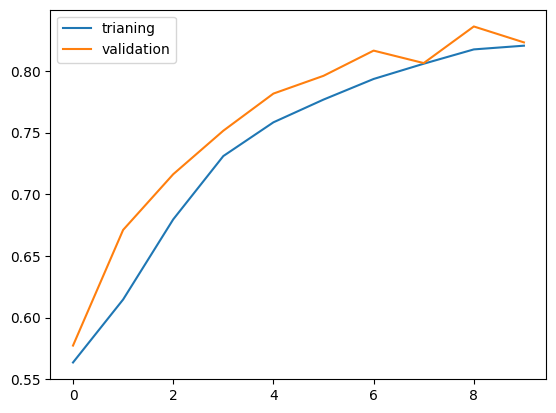

In [15]:
history.history
plt.plot(history.history['accuracy'], label='trianing')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()

In [13]:
model.save('cats_vs_dogs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
model_load = tf.keras.models.load_model('cats_vs_dogs.h5')

In [48]:
import requests
from io import BytesIO
from PIL import Image
from tensorflow.keras.preprocessing import image

In [56]:
img_url = "https://plus.unsplash.com/premium_photo-1668208365386-4198381c6f6e?q=80&w=1887&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

#img = Image.open(requests.get(img_url, stream=True).raw).resize(150, 150)
img = img.resize((150, 150))
image_array = image.img_to_array(img)
img = np.expand_dims(image_array, axis=0)

img = img/255

prediction = model_load.predict(img)

Threshold = 0.5
prediction = int(prediction[0][0]  > Threshold)
classes = {v:k for k, v in train_generator.class_indices.items()}
print(classes[prediction])

1/1 [==============================] - 0s 378ms/step
cat
